## Analysis of Enron email dataset 

The Enron email dataset contains approximately 500,000 emails generated by employees of the Enron Corporation. It was obtained by the Federal Energy Regulatory Commission during its investigation of Enron's collapse.

Kinds of analysis: 
- Exploratory Data Analysis: Pose questions such as the busiest time of the day and week in terms of emails sent and also try to find out the most frequent emails senders.
- Sentiment Analysis : Perform sentiment analysis on the emails using classification of emails based on content into negative/positive/neutral and word cloud to detect the type of the messages.
- Anomaly detection : Perform a time series analysis to detect abnormal behaviour using sentiment analysis.
 


### Data Sources

Please access the dataset at the following link - https://www.kaggle.com/wcukierski/enron-email-dataset

## Data Analysis

In [1]:
#import some common libraries
import pandas as pd
import numpy as np
# text processing
import nltk
# machine learning
import sklearn

The dataset we have chosen is the Enron email dataset from Kaggle. This dataset is a subset of the original dataset and contains:
- file: contains the original directory and filename of each email. The root level of this path is the employee to whom the emails belong.
- message: contains the email text

In [3]:
#Import the dataset 
enron_emails = pd.read_csv("emails.csv", encoding='ANSI')
enron_emails.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


Let's print a sample message to see how it looks like

In [4]:
print(enron_emails['message'][0])

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


The message seems to be divided into the following parts
- Message ID 
- Date 
- Sender 
- Receiver 
- Subject 
- Some additional meta data 
- Message body

For the purposes of our analysis we will further divide this dataset into additional columns. 
- Message ID
- Date 
- From 
- To
- Sender
- Message body 

In [5]:
#Parse the email as a message object to extract details from it
import email as em
parsed_messages = list(map(em.message_from_string,enron_emails['message']))

In [6]:
#drop earlier un parsed messages from dataset
enron_emails.drop('message', axis=1, inplace=True)

In [7]:
#Check the message keys
print(parsed_messages[0].keys())
print(parsed_messages[0])

['Message-ID', 'Date', 'From', 'To', 'Subject', 'Mime-Version', 'Content-Type', 'Content-Transfer-Encoding', 'X-From', 'X-To', 'X-cc', 'X-bcc', 'X-Folder', 'X-Origin', 'X-FileName']
Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 


In [8]:
def get_message_from_email(msg):
    '''To get the message text from the email'''
    email_message = []
    for piece in msg.walk():
        if piece.get_content_type() == 'text/plain':
            email_message.append( piece.get_payload() )
    return ''.join(email_message)

def get_receiver_email_addresses(message):
    '''To extract multiple email addresses'''
    if message['To']:
        line = message['To']
        address = line.split(',')
        address = list(map(lambda x: x.strip(), address))
    else:
        address = None
    return address

In [9]:
# Parse content from emails
enron_emails['Message'] = list(map(get_message_from_email, parsed_messages))
enron_emails['From'] = [message['From'] for message in parsed_messages]
enron_emails['Subject'] = [message['Subject'] for message in parsed_messages]
enron_emails['To'] = list(map(get_receiver_email_addresses, parsed_messages))
enron_emails['Date'] = [message['Date'] for message in parsed_messages]
enron_emails['Sender'] = enron_emails['file'].map(lambda x:x.split('/')[0])

enron_emails.head()

,file,Message,From,Subject,To,Date,Sender
0,allen-p/_sent_mail/1.,Here is our forecast\n\n,phillip.allen@enron.com,,[tim.belden@enron.com],"Mon, 14 May 2001 16:39:00 -0700 (PDT)",allen-p
1,allen-p/_sent_mail/10.,Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,[john.lavorato@enron.com],"Fri, 4 May 2001 13:51:00 -0700 (PDT)",allen-p
2,allen-p/_sent_mail/100.,test successful. way to go!!!,phillip.allen@enron.com,Re: test,[leah.arsdall@enron.com],"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",allen-p
3,allen-p/_sent_mail/1000.,"Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,,[randall.gay@enron.com],"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",allen-p
4,allen-p/_sent_mail/1001.,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,[greg.piper@enron.com],"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",allen-p


In [10]:
#Delete the list of parsed email messages
del parsed_messages

In [11]:
#Convert the date string into a python date time object 
enron_emails['Date'] = pd.to_datetime(enron_emails['Date'], infer_datetime_format=True)
enron_emails.head()

,file,Message,From,Subject,To,Date,Sender
0,allen-p/_sent_mail/1.,Here is our forecast\n\n,phillip.allen@enron.com,,[tim.belden@enron.com],2001-05-14 23:39:00,allen-p
1,allen-p/_sent_mail/10.,Traveling to have a business meeting takes the...,phillip.allen@enron.com,Re:,[john.lavorato@enron.com],2001-05-04 20:51:00,allen-p
2,allen-p/_sent_mail/100.,test successful. way to go!!!,phillip.allen@enron.com,Re: test,[leah.arsdall@enron.com],2000-10-18 10:00:00,allen-p
3,allen-p/_sent_mail/1000.,"Randy,\n\n Can you send me a schedule of the s...",phillip.allen@enron.com,,[randall.gay@enron.com],2000-10-23 13:13:00,allen-p
4,allen-p/_sent_mail/1001.,Let's shoot for Tuesday at 11:45.,phillip.allen@enron.com,Re: Hello,[greg.piper@enron.com],2000-08-31 12:07:00,allen-p


Let's perform some basic EDA on this dataset now.

### Section 1: Exploratory data analysis

#### What time of the week are most of the emails sent ?

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

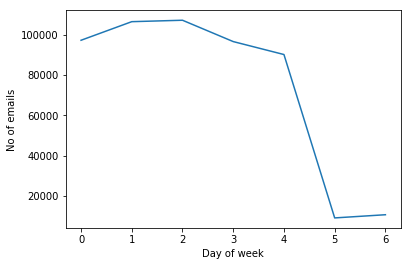

In [13]:
day_of_week = enron_emails.groupby(enron_emails['Date'].dt.weekday)['Message'].count().plot()
day_of_week.set_xlabel('Day of week', fontsize=10)
day_of_week.set_ylabel('No of emails', fontsize=10)
plt.show()

#### What hour of the day are most of the emails sent ?

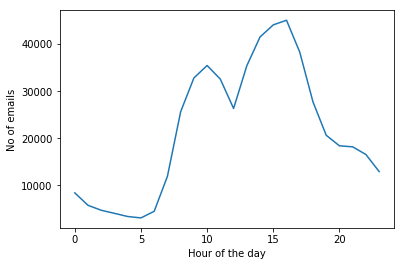

In [14]:
hour_of_day = enron_emails.groupby(enron_emails['Date'].dt.hour)['Message'].count().plot()
hour_of_day.set_xlabel('Hour of the day', fontsize=10)
hour_of_day.set_ylabel('No of emails', fontsize=10)
plt.show()

#### Top 5 email senders ?

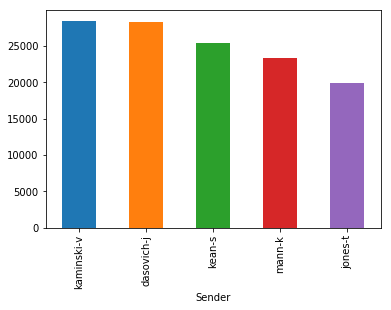

In [15]:
frequent_sender = enron_emails.groupby(enron_emails['Sender'])['Message'].count()
frequent_sender.sort_values(ascending=False)[:5].plot.bar()
plt.show()

## Section 2: Sentiment Analysis

### Text Normalization
after ignoring cases, removing stopwords, extra whitespaces and punctuations, we tried to reduce words to their stems. Used the PorterStemmer algorithm to perform word stemming on email text. The NLTK package has an implementation of this algorithm. 

In [16]:
import re
from nltk.corpus import stopwords
stop = stopwords.words('english')

enron_emails['Message'] = enron_emails['Message'].str.lower()
enron_emails['Message'] = enron_emails['Message'].str.strip()
enron_emails['Message'] = enron_emails['Message'].str.replace('[^\w\s]',' ')
enron_emails['Message'] = enron_emails['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [17]:
enron_emails['Message']

0                                                  forecast
1         traveling business meeting takes fun trip espe...
2                                    test successful way go
3         randy send schedule salary level everyone sche...
4                                   let shoot tuesday 11 45
5                 greg either next tuesday thursday phillip
6         please cc following distribution list updates ...
7                                          morning 10 11 30
8         1 login pallen pw ke9davis think required isp ...
9         forwarded phillip k allen hou ect 10 16 2000 0...
10        mr buckner delivered gas behind san diego enro...
11        lucy rentrolls open save rentroll folder follo...
12        forwarded phillip k allen hou ect 10 09 2000 0...
13        forwarded phillip k allen hou ect 10 09 2000 0...
14        dave names west desk members category originat...
15                            paula 35 million fine phillip
16        forwarded phillip k allen hou 

In [18]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

In [19]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [20]:
#Reduce the words to their stems
from nltk.tokenize import word_tokenize
enron_emails['Message']=enron_emails['Message'].apply(word_tokenize)

### Email classification into negative/positive/neutral

We will now perform a sentiment analysis wherein we classify the emails into positive and negative in tone. We will use the NRC definition of words associated with positive and negative emotions to first extract the words associated with each emotion. Once we receive the total positive and total negative words from the email we perform a simple comparison to determine whether the email is:
- positive in tone (sentiment coding 1)
- negative in tone (sentiment coding -1)
- neutral in tone (sentiment coding 0)

In [21]:
import sentiments_nrc as nrc
nrc.SENTIMENTS
nrc.EMOTIONS
EMOTIONS_list = nrc.EMOTIONS
EMOTIONS_list.sort()
EMOTIONS_list

['anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'negative',
 'positive',
 'sadness',
 'surprise',
 'trust']

In [22]:
from sentiments_nrc import SENTIMENTS
from sentiments_nrc import EMOTIONS

print(SENTIMENTS)
print(EMOTIONS)

{'abacus': {'trust': 1}, 'abandon': {'sadness': 1, 'fear': 1, 'negative': 1}, 'abandoned': {'sadness': 1, 'negative': 1, 'anger': 1, 'fear': 1}, 'abandonment': {'surprise': 1, 'sadness': 1, 'negative': 1, 'anger': 1, 'fear': 1}, 'abba': {'positive': 1}, 'abbot': {'trust': 1}, 'abduction': {'sadness': 1, 'surprise': 1, 'fear': 1, 'negative': 1}, 'aberrant': {'negative': 1}, 'aberration': {'disgust': 1, 'negative': 1}, 'abhor': {'disgust': 1, 'negative': 1, 'anger': 1, 'fear': 1}, 'abhorrent': {'disgust': 1, 'negative': 1, 'anger': 1, 'fear': 1}, 'ability': {'positive': 1}, 'abject': {'disgust': 1, 'negative': 1}, 'abnormal': {'disgust': 1, 'negative': 1}, 'abolish': {'anger': 1, 'negative': 1}, 'abolition': {'negative': 1}, 'abominable': {'disgust': 1, 'fear': 1, 'negative': 1}, 'abomination': {'disgust': 1, 'negative': 1, 'anger': 1, 'fear': 1}, 'abort': {'negative': 1}, 'abortion': {'sadness': 1, 'disgust': 1, 'fear': 1, 'negative': 1}, 'abortive': {'sadness': 1, 'negative': 1}, 'abov

In [24]:
def get_words_with_emotions(word_list,emotion):
    '''get words with postive or negative emotions'''
    e_words=[]
    for v in word_list:
        if (nrc.SENTIMENTS.get(v)!=None):
            if (nrc.SENTIMENTS.get(v).get(emotion)==1):
                e_words.append(v)
        
            
    return e_words

In [118]:
sentiment = []
for word_list in enron_emails['Message']:
    #get the total no of words for a emotion
    positive_words = get_words_with_emotions(word_list,'positive')
    n_pWords= len (positive_words)

    negative_words = get_words_with_emotions(word_list,'negative')
    n_nWords= len (negative_words)

    #use a simple comaparison on the number of words of each type to determine the tone of the email
    if(n_pWords>n_nWords):
        sentiment.append(1)
    elif(n_pWords<n_nWords):
        sentiment.append(-1)
    else:
        sentiment.append(0)
    
        
    

In [29]:
enron_emails['Sentiment Score']= sentiment

In [30]:
enron_emails

,file,Message,From,Subject,To,Date,Sender,Sentiment Score
0,allen-p/_sent_mail/1.,[forecast],phillip.allen@enron.com,,[tim.belden@enron.com],2001-05-14 23:39:00,allen-p,0
1,allen-p/_sent_mail/10.,"[traveling, business, meeting, takes, fun, tri...",phillip.allen@enron.com,Re:,[john.lavorato@enron.com],2001-05-04 20:51:00,allen-p,1
2,allen-p/_sent_mail/100.,"[test, successful, way, go]",phillip.allen@enron.com,Re: test,[leah.arsdall@enron.com],2000-10-18 10:00:00,allen-p,1
3,allen-p/_sent_mail/1000.,"[randy, send, schedule, salary, level, everyon...",phillip.allen@enron.com,,[randall.gay@enron.com],2000-10-23 13:13:00,allen-p,1
4,allen-p/_sent_mail/1001.,"[let, shoot, tuesday, 11, 45]",phillip.allen@enron.com,Re: Hello,[greg.piper@enron.com],2000-08-31 12:07:00,allen-p,-1
5,allen-p/_sent_mail/1002.,"[greg, either, next, tuesday, thursday, phillip]",phillip.allen@enron.com,Re: Hello,[greg.piper@enron.com],2000-08-31 11:17:00,allen-p,0
6,allen-p/_sent_mail/1003.,"[please, cc, following, distribution, list, up...",phillip.allen@enron.com,,"[david.l.johnson@enron.com, john.shafer@enron....",2000-08-22 14:44:00,allen-p,0
7,allen-p/_sent_mail/1004.,"[morning, 10, 11, 30]",phillip.allen@enron.com,Re: PRC review - phone calls,[joyce.teixeira@enron.com],2000-07-14 13:59:00,allen-p,0
8,allen-p/_sent_mail/101.,"[1, login, pallen, pw, ke9davis, think, requir...",phillip.allen@enron.com,Re: High Speed Internet Access,[mark.scott@enron.com],2000-10-17 09:26:00,allen-p,0
9,allen-p/_sent_mail/102.,"[forwarded, phillip, k, allen, hou, ect, 10, 1...",phillip.allen@enron.com,FW: fixed forward or other Collar floor gas pr...,[zimam@enron.com],2000-10-16 13:44:00,allen-p,1


### Sentiment analysis using word cloud

(-0.5, 799.5, 599.5, -0.5)

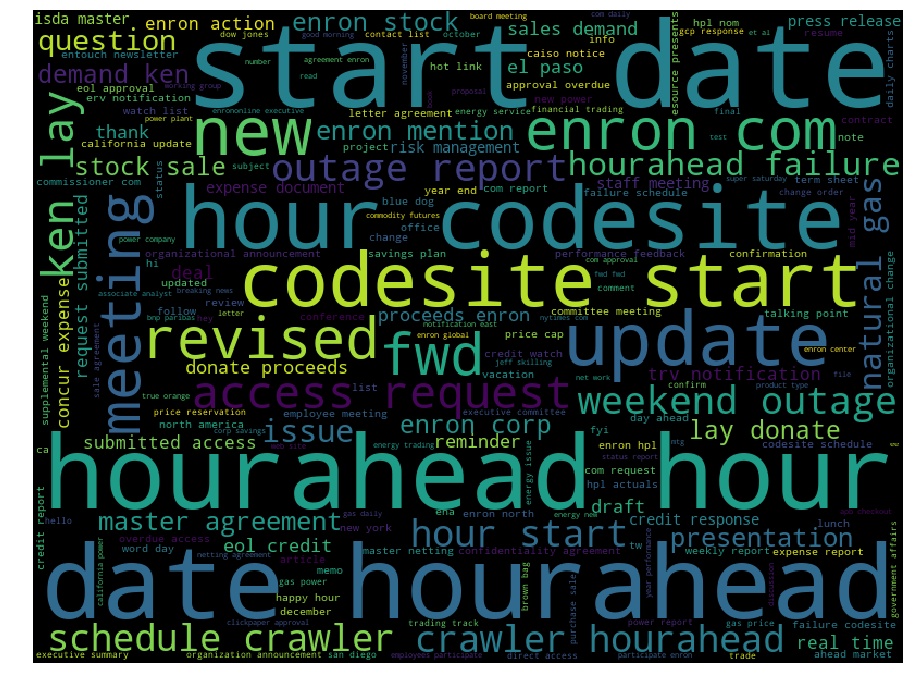

In [31]:
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

enron_emails['Subject'] = enron_emails['Subject'].str.lower()
enron_emails['Subject'] = enron_emails['Subject'].str.strip()
subjects = ' '.join(enron_emails['Subject'])

custom_stop_words = ['fw']


for w in custom_stop_words:
    pattern = r'\b'+w+r'\b'
    subjects = re.sub(pattern, '', subjects)
    

fig, ax = plt.subplots(figsize=(16, 12))
wc = WordCloud(width=800, 
                         height=600, 
                         max_words=200,
                         stopwords=ENGLISH_STOP_WORDS).generate(subjects)
ax.imshow(wc)
ax.axis("off")

## Section 3: Anomaly detection

Uisng the classification of emails into positive, negative and neutral in tone, we use this information to chart the number of negative emails received across the years to see if we can detect odd patterns/spikes.

In [32]:
enron_emails.head()

,file,Message,From,Subject,To,Date,Sender,Sentiment Score
0,allen-p/_sent_mail/1.,[forecast],phillip.allen@enron.com,,[tim.belden@enron.com],2001-05-14 23:39:00,allen-p,0
1,allen-p/_sent_mail/10.,"[traveling, business, meeting, takes, fun, tri...",phillip.allen@enron.com,re:,[john.lavorato@enron.com],2001-05-04 20:51:00,allen-p,1
2,allen-p/_sent_mail/100.,"[test, successful, way, go]",phillip.allen@enron.com,re: test,[leah.arsdall@enron.com],2000-10-18 10:00:00,allen-p,1
3,allen-p/_sent_mail/1000.,"[randy, send, schedule, salary, level, everyon...",phillip.allen@enron.com,,[randall.gay@enron.com],2000-10-23 13:13:00,allen-p,1
4,allen-p/_sent_mail/1001.,"[let, shoot, tuesday, 11, 45]",phillip.allen@enron.com,re: hello,[greg.piper@enron.com],2000-08-31 12:07:00,allen-p,-1


In [115]:
#Create a column where the year is stored for each messsage
enron_emails['Year'] = enron_emails['Date'].dt.year

#Group emails based on both year and sentiment 
ad = enron_emails.groupby([enron_emails['Year'], enron_emails['Sentiment Score']])['Message'].count()
stodf = ad.to_frame()
stodf = stodf.reset_index()
stodf.head()

#Restrict the dataset as of now to only a certain subsection
df1 = stodf[(stodf['Sentiment Score'] == -1) & (stodf['Year'] > 1995) & (stodf['Year'] <2011)]
df1.columns = ['Year','Score','Negative count']

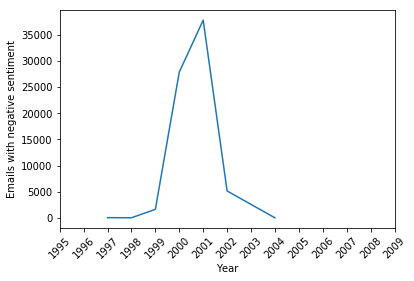

In [117]:
#Plot negative email frequency across years
plt.plot(df1['Year'], df1['Negative count'])
plt.xticks(np.arange(1995,2010))
plt.tick_params(axis ='x', rotation = 45) 
plt.xlabel('Year')
plt.ylabel('Emails with negative sentiment')
plt.show()

From this graph we can see that there was a sudden spike in the number of emails received in the years from 2000 to 2001 after which there is a sudden decline once again.